# Базовый пайплайн для соревнования по определению контрафакта 

### 1. Загрузка данных

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, f1_score
import warnings

df_train = pd.read_csv('../data/ml_ozon_train.csv', index_col=0)
df_test = pd.read_csv('../data/ml_ozon_test.csv', index_col=0)

print(f"Train shape: {df_train.shape}")
print(f"Test shape: {df_test.shape}")
print(f"Target distribution in train:")
print(df_train['resolution'].value_counts())
print()
print(df_train['resolution'].value_counts()[1] / len(df_train) * 100)
print()

Train shape: (197198, 44)
Test shape: (22760, 43)
Target distribution in train:
resolution
0    184146
1     13052
Name: count, dtype: int64

6.618728384669216



In [2]:
df_train[:10].to_csv('../data/train_subset.csv')
df_test[:10].to_csv('../data/test_subset.csv')

In [2]:
df_test.head()

,brand_name,description,name_rus,CommercialTypeName4,rating_1_count,rating_2_count,rating_3_count,rating_4_count,rating_5_count,comments_published_count,...,ExemplarReturnedCountTotal30,ExemplarReturnedCountTotal90,ExemplarReturnedValueTotal7,ExemplarReturnedValueTotal30,ExemplarReturnedValueTotal90,ItemVarietyCount,ItemAvailableCount,seller_time_alive,ItemID,SellerID
id,,,,,,,,,,,,,,,,,,,,,
17384,NaN,Приветствую! Мы собираем классные системные бл...,"LeBefane Системный блок (AMD Ryzen 5 7500F, RA...",Настольный компьютер,NaN,NaN,NaN,NaN,NaN,NaN,...,1.0,3.0,0.000000,658.085303,768.020850,1.0,1.0,1010.0,8777,398
260316,Canon,<li>Тип товара Новый</li><li><b>Тип</b> Картри...,Картридж лазерный Canon 071H 5646C002 черный (...,"Картридж, чернила, тонер",NaN,NaN,NaN,NaN,NaN,NaN,...,102.0,277.0,1046.284281,1259.789504,1386.227650,425.0,425.0,997.0,127929,576
10610,Devia,Электронное перо Touch S-Pen для Samsung Galax...,Стилус для Samsung Galaxy Z Fold5 5G/ SM-F946B...,Стилус,NaN,NaN,NaN,NaN,NaN,NaN,...,93.0,244.0,934.117581,1111.416588,1201.633994,9.0,9.0,812.0,5341,1946
205236,GALAXY LINE,Мультиварка GALAXY GL2643 имеет все необходимы...,"Мультиварка GALAXY GL2643 ( 900 Вт, 10 програм...","Мультиварка, скороварка",NaN,NaN,NaN,NaN,NaN,NaN,...,23.0,61.0,1067.935416,1267.434380,1322.794836,8.0,8.0,785.0,100481,697
308655,MAUNFELD,Чайники с ретро-термометром позволяет нагреть ...,Чайник электрический MAUNFELD MGK-625MINT. Тов...,Чайник электрический,NaN,NaN,NaN,NaN,NaN,NaN,...,557.0,1476.0,1405.752984,1553.905780,1643.785320,57.0,57.0,1767.0,151937,1575


In [13]:
df_test_prepared = pd.read_csv('../data/test.csv')
df_test_prepared

,Unnamed: 0,brand_name,description,name_rus,CommercialTypeName4,rating_1_count,rating_2_count,rating_3_count,rating_4_count,rating_5_count,...,fraud_desc_url,fraud_title_brand_names,fraud_title_mixed_alphabets,fraud_title_phone,fraud_title_repeated_chars,fraud_title_short_description,fraud_title_suspicious_keywords,fraud_title_suspicious_numbers,fraud_title_title_description_mismatch,fraud_title_unusual_punct
0,0,unknown,приветствую ! мы собираем классные системные б...,"lebefane системный блок ( amd ryzen 5 7500f , ...",Настольный компьютер,0.0,0.0,0.0,0.0,0.0,...,False,True,False,False,False,False,False,False,True,False
1,1,Canon,тип товара новыйтип картриджназначение для лаз...,картридж лазерный canon 071h 5646c002 черный (...,"Картридж, чернила, тонер",0.0,0.0,0.0,0.0,0.0,...,False,True,False,False,False,False,False,False,False,False
2,2,Devia,электронное перо touch s-pen для samsung galax...,стилус для samsung galaxy z fold5 5g/ sm-f946b...,Стилус,0.0,0.0,0.0,0.0,0.0,...,False,True,False,False,False,False,False,False,True,False
3,3,GALAXY LINE,мультиварка galaxy gl2643 имеет все необходимы...,"мультиварка galaxy gl2643 ( 900 вт , 10 програ...","Мультиварка, скороварка",0.0,0.0,0.0,0.0,0.0,...,False,True,False,False,False,False,False,False,True,False
4,4,MAUNFELD,чайники с ретро-термометром позволяет нагреть ...,чайник электрический maunfeld mgk-625mint . то...,Чайник электрический,0.0,0.0,0.0,0.0,0.0,...,False,True,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22755,22755,unknown,уникальный силиконовый 3d чехол для этот гадже...,защитные наушники huawei free clip,Чехол для портативной акустики,0.0,0.0,0.0,0.0,0.0,...,False,True,False,False,False,True,False,False,True,False
22756,22756,GARLYN,NaN,пылесос вертикальный беспроводной garlyn m-750...,Пылесос вертикальный,0.0,0.0,0.0,0.0,0.0,...,False,True,False,False,False,True,False,False,True,False
22757,22757,Dell,dell precision t3420 — компактная рабочая стан...,dell системный блок производительная рабочая с...,Настольный компьютер,0.0,0.0,0.0,0.0,0.0,...,False,True,False,False,False,False,False,False,False,False
22758,22758,unknown,кабель оптический для телевизора samsung q900r...,кабель оптический для телевизора samsung q900r...,Запчасти для телевизора,0.0,0.0,0.0,0.0,0.0,...,False,True,False,False,False,False,False,False,True,False


In [14]:
item = df_test_prepared.iloc[0, ]
item.iloc[0]

np.int64(0)

In [9]:
sub = pd.read_csv('./submission.csv')
sub

,id,prediction
0,17384,0
1,260316,0
2,10610,0
3,205236,0
4,308655,0
...,...,...
22755,423002,1
22756,316386,0
22757,245410,0
22758,440579,0


In [3]:
df_train.describe()

,resolution,rating_1_count,rating_2_count,rating_3_count,rating_4_count,rating_5_count,comments_published_count,photos_published_count,videos_published_count,PriceDiscounted,...,ExemplarReturnedCountTotal30,ExemplarReturnedCountTotal90,ExemplarReturnedValueTotal7,ExemplarReturnedValueTotal30,ExemplarReturnedValueTotal90,ItemVarietyCount,ItemAvailableCount,seller_time_alive,ItemID,SellerID
count,197198.000000,47193.000000,47193.000000,47193.000000,47193.000000,47193.000000,47193.000000,47193.000000,47193.000000,197198.000000,...,189268.000000,189791.000000,187007.000000,189268.000000,189791.000000,196201.000000,196201.000000,197198.000000,197198.000000,197198.000000
mean,0.066187,2.048355,0.594876,1.109932,1.253067,13.446274,9.519505,4.412222,0.482699,758.971530,...,51.802196,147.169818,701.520465,905.735423,1025.111018,98.790485,98.732489,684.575827,110563.014001,1504.121553
std,0.248610,13.767362,3.398610,6.044903,6.175065,63.103940,46.637693,18.477008,3.595718,155.940582,...,164.435978,511.811000,413.671912,374.229445,360.664928,245.133031,245.151594,498.399100,63773.111390,2256.212708
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,651.081516,...,3.000000,9.000000,611.486957,858.718884,968.864810,2.000000,2.000000,262.000000,55220.250000,157.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,1.000000,0.000000,0.000000,736.695421,...,16.000000,45.000000,856.211201,1008.683523,1116.673313,7.000000,7.000000,607.000000,110732.500000,514.000000
75%,0.000000,1.000000,0.000000,1.000000,1.000000,7.000000,4.000000,3.000000,0.000000,827.955170,...,52.000000,143.000000,990.670761,1131.163329,1229.895511,58.000000,58.000000,1058.000000,165852.750000,1723.000000
max,1.000000,1007.000000,199.000000,329.000000,518.000000,4465.000000,1753.000000,1035.000000,241.000000,1816.563093,...,55681.000000,181600.000000,1663.665513,1807.589625,1914.000284,1548.000000,1548.000000,2265.000000,220806.000000,12508.000000


In [4]:
df_train.columns

Index(['resolution', 'brand_name', 'description', 'name_rus',
       'CommercialTypeName4', 'rating_1_count', 'rating_2_count',
       'rating_3_count', 'rating_4_count', 'rating_5_count',
       'comments_published_count', 'photos_published_count',
       'videos_published_count', 'PriceDiscounted', 'item_time_alive',
       'item_count_fake_returns7', 'item_count_fake_returns30',
       'item_count_fake_returns90', 'item_count_sales7', 'item_count_sales30',
       'item_count_sales90', 'item_count_returns7', 'item_count_returns30',
       'item_count_returns90', 'GmvTotal7', 'GmvTotal30', 'GmvTotal90',
       'ExemplarAcceptedCountTotal7', 'ExemplarAcceptedCountTotal30',
       'ExemplarAcceptedCountTotal90', 'OrderAcceptedCountTotal7',
       'OrderAcceptedCountTotal30', 'OrderAcceptedCountTotal90',
       'ExemplarReturnedCountTotal7', 'ExemplarReturnedCountTotal30',
       'ExemplarReturnedCountTotal90', 'ExemplarReturnedValueTotal7',
       'ExemplarReturnedValueTotal30', 'Exempl

In [5]:
df_train.iloc[0,]

resolution                                                                      0
brand_name                                                                 ACTRUM
description                     Мешки пылесборники для пылесоса PHILIPS, 10 шт...
name_rus                        Мешки для пылесоса PHILIPS TRIATLON, синтетиче...
CommercialTypeName4                                                   Пылесборник
rating_1_count                                                                6.0
rating_2_count                                                                4.0
rating_3_count                                                                4.0
rating_4_count                                                                3.0
rating_5_count                                                               32.0
comments_published_count                                                      3.0
photos_published_count                                                        6.0
videos_published

(197198, 44)
<class 'pandas.core.frame.DataFrame'>
Index: 197198 entries, 159385 to 104566
Data columns (total 44 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   resolution                    197198 non-null  int64  
 1   brand_name                    116667 non-null  object 
 2   description                   171138 non-null  object 
 3   name_rus                      197198 non-null  object 
 4   CommercialTypeName4           197198 non-null  object 
 5   rating_1_count                47193 non-null   float64
 6   rating_2_count                47193 non-null   float64
 7   rating_3_count                47193 non-null   float64
 8   rating_4_count                47193 non-null   float64
 9   rating_5_count                47193 non-null   float64
 10  comments_published_count      47193 non-null   float64
 11  photos_published_count        47193 non-null   float64
 12  videos_published_count        4

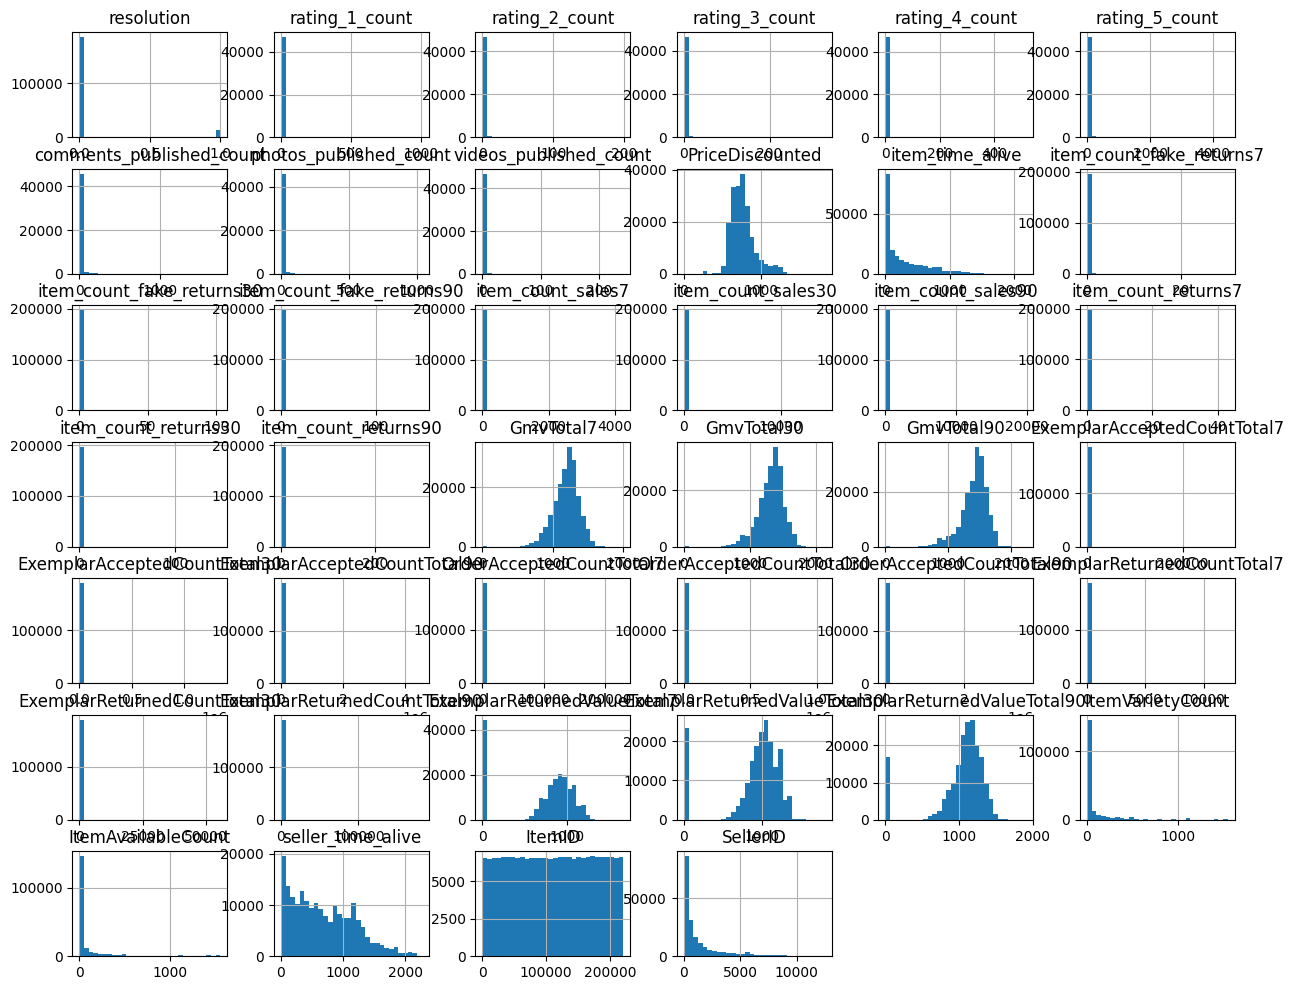

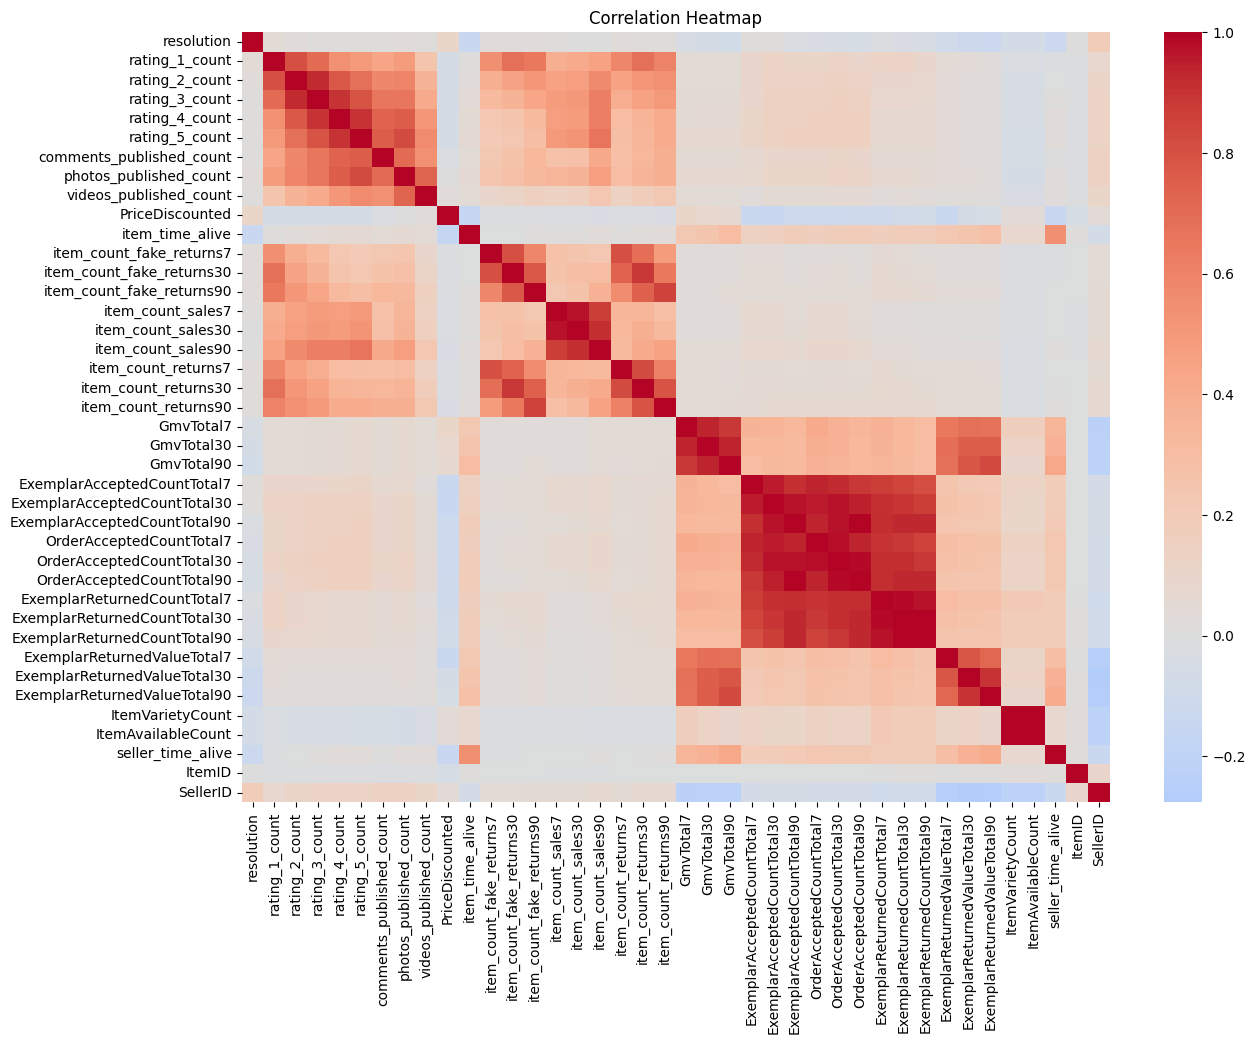

brand_name
iQZiP            6084
ProFDetali       4811
OEM              4275
Sony             3053
Levsha kaluga    3009
HUAYU            2754
OINO             2741
HotComputers     2391
Cameron Sino     2055
MyPads           2001
Name: resolution, dtype: int64
CommercialTypeName4
Дисплеи для телефонов                        15002
Аккумулятор для мобильного телефона          11965
Корпуса для телефонов                        11960
Запчасти для телевизора                      10192
Картридж, чернила, тонер                      8570
Шлейфы для телефонов                          8442
Запчасти для стиральной, сушильной машины     6807
Настольный компьютер                          6335
Видеоигра Sony                                4151
Универсальный пульт для электроники           3753
Name: resolution, dtype: int64


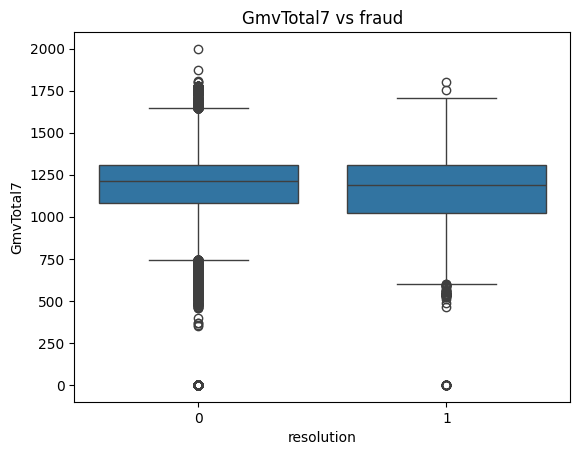

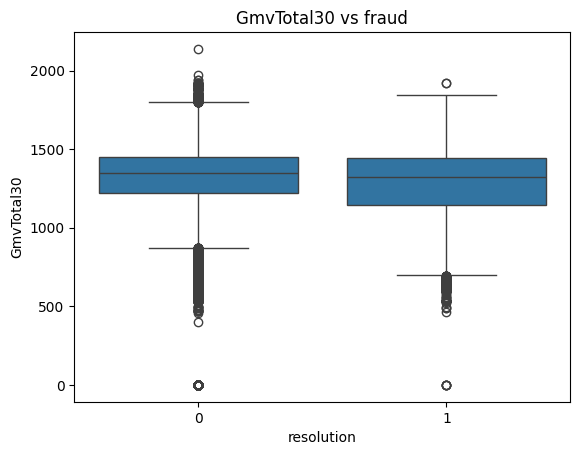

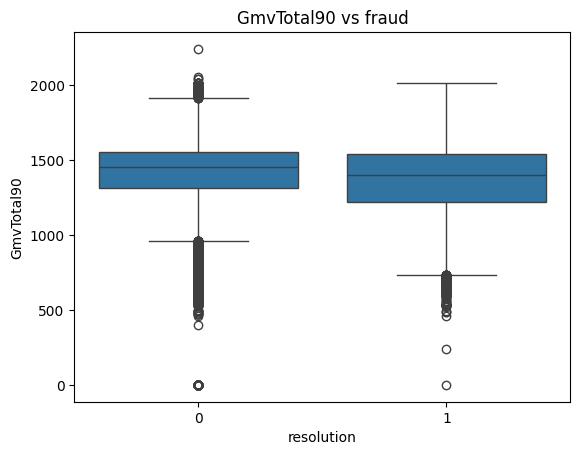

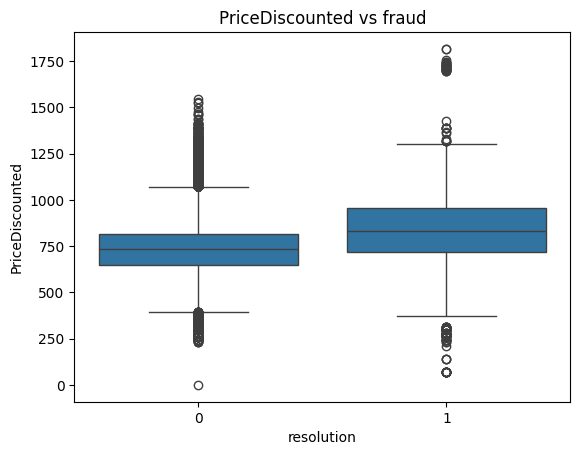

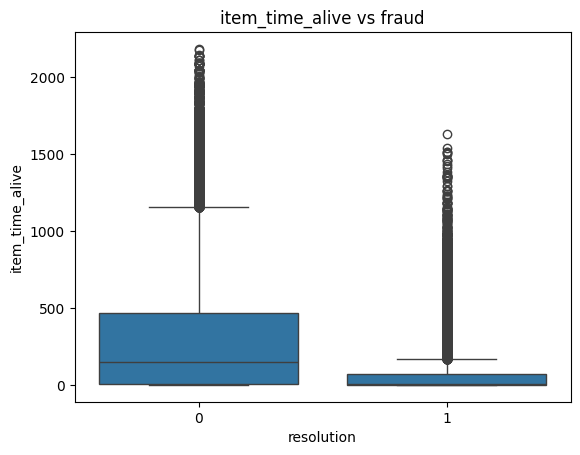

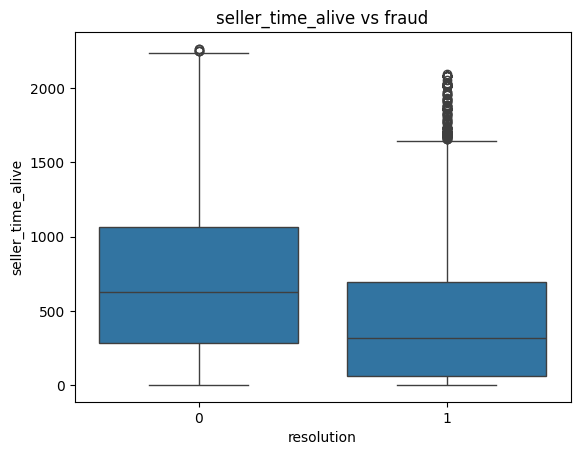

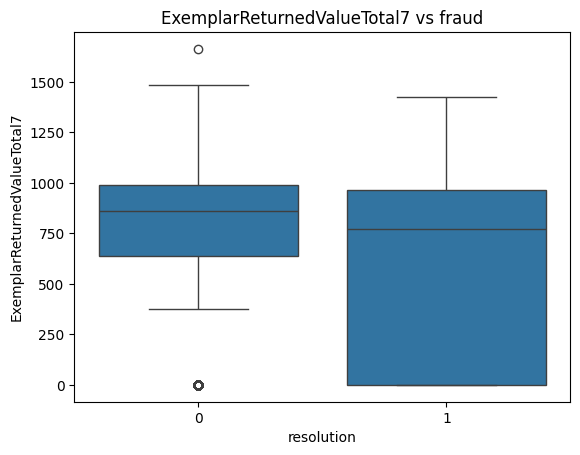

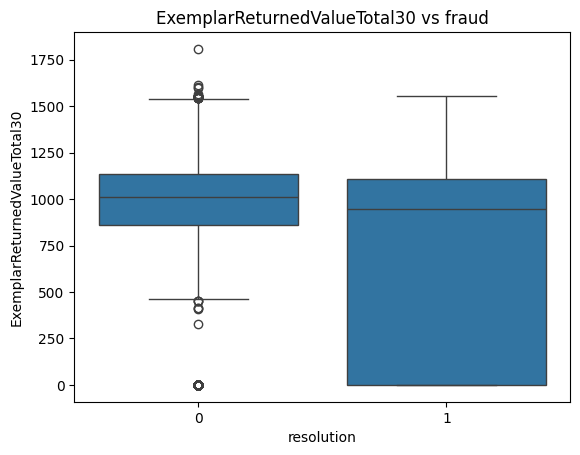

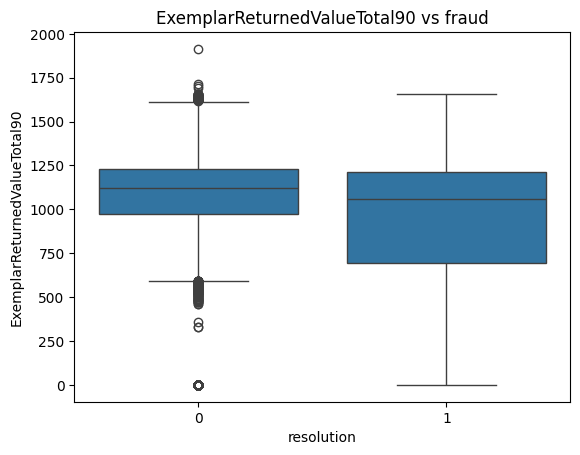

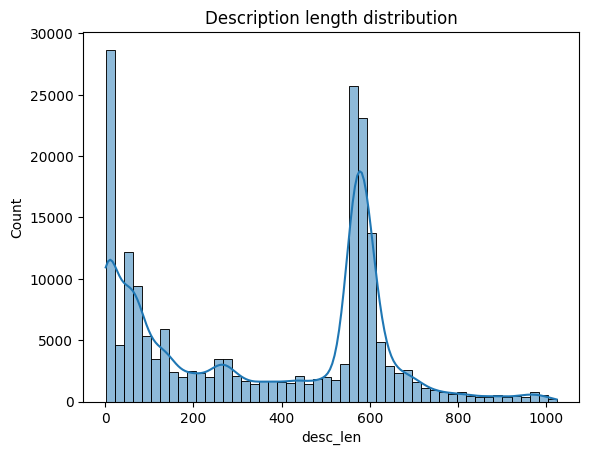

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = df_train.copy()

# --- Basic info ---
print(df.shape)
print(df.info())
print(df.describe())

# Missing values
missing = df.isna().mean().sort_values(ascending=False)
print(missing.head(20))

# Fraud rate (if you have target)
print(df['resolution'].value_counts(normalize=True))

# --- Univariate distributions ---
num_cols = df.select_dtypes(include=['float64','int64']).columns
df[num_cols].hist(figsize=(15,12), bins=30)
plt.show()

# --- Correlation heatmap ---
plt.figure(figsize=(14,10))
sns.heatmap(df[num_cols].corr(), cmap="coolwarm", center=0)
plt.title("Correlation Heatmap")
plt.show()

# --- Fraud rate vs categorical ---
cat_cols = ['brand_name', 'CommercialTypeName4']
for c in cat_cols:
    fraud_rate = df.groupby(c)['resolution'].count().sort_values(ascending=False)
    print(fraud_rate.head(10))

# --- Fraud rate vs continuous ---
cont_cols = ['GmvTotal7',
             'GmvTotal30',
             'GmvTotal90',
             'PriceDiscounted',
             'item_time_alive',
             'seller_time_alive',
             'ExemplarReturnedValueTotal7',
             'ExemplarReturnedValueTotal30',
             'ExemplarReturnedValueTotal90']
for col in cont_cols:
    sns.boxplot(x="resolution", y=col, data=df)
    plt.title(f"{col} vs fraud")
    plt.show()

# --- Text length distributions ---
df['desc_len'] = df['description'].astype(str).str.len()
df['name_len'] = df['name_rus'].astype(str).str.len()

sns.histplot(df['desc_len'], bins=50, kde=True)
plt.title("Description length distribution")
plt.show()


### 2. Предобработка данных
Используем 39 числовых признаков

In [7]:
numeric_columns = df_train.select_dtypes(include=[np.number]).columns.tolist()
numeric_columns = [col for col in numeric_columns if col != 'resolution']

df_train[numeric_columns] = df_train[numeric_columns].fillna(0)
df_test[numeric_columns] = df_test[numeric_columns].fillna(0)

df_train[cat_cols] = df_train[cat_cols].fillna("unknown")
df_test[cat_cols] = df_test[cat_cols].fillna("unknown")

In [8]:
def add_feat(df_train, df_test):

    for df in [df_train, df_test]:
        # --- Ratios & rates ---
        df['return_rate_30'] = df['item_count_returns30'] / (df['item_count_sales30'] + 1e-6)
        df['fake_return_rate_30'] = df['item_count_fake_returns30'] / (df['item_count_sales30'] + 1e-6)
        df['refund_value_ratio_30'] = df['ExemplarReturnedValueTotal30'] / (df['GmvTotal30'] + 1e-6)

        # --- Growth / trend features ---
        df['sales_growth_7_30'] = (df['item_count_sales7']+1) / (df['item_count_sales30']+1)
        df['sales_growth_30_90'] = (df['item_count_sales30']+1) / (df['item_count_sales90']+1)

        # --- Activity rates ---
        df['sales_velocity'] = df['item_count_sales30'] / (df['item_time_alive'] + 1e-6)
        df['seller_velocity'] = df['item_count_sales30'] / (df['seller_time_alive'] + 1e-6)

        # --- Text features ---
        df['desc_len'] = df['description'].astype(str).str.len()
        df['desc_word_count'] = df['description'].astype(str).str.split().str.len()
        df['name_len'] = df['name_rus'].astype(str).str.len()

        # --- Interaction features ---
        df['price_return_interaction'] = df['PriceDiscounted'] * df['return_rate_30']
        df['gmv_per_day'] = df['GmvTotal30'] / (df['item_time_alive'] + 1)

    # --- Seller-level aggregations ---
    seller_stats = df_train.groupby('SellerID').agg(
        seller_total_items=('ItemID','count'),
        seller_total_sales=('item_count_sales30','sum'),
        seller_avg_return_rate=('return_rate_30','mean')
    ).reset_index()

    # --- Anomaly score (optional, unsupervised) ---
    from sklearn.ensemble import IsolationForest

    iso = IsolationForest(contamination=0.05, random_state=42)
    iso.fit(df_train[numeric_columns].fillna(0))

    for df in [df_train, df_test]:
        df = df.merge(seller_stats, on='SellerID', how='left')

        df['anomaly_score'] = iso.predict(df[numeric_columns].fillna(0))

    return df_train, df_test


In [9]:
df_train, df_test = add_feat(df_train, df_test)

In [10]:
df_train = df_train.drop(columns=['ItemID', 'SellerID'])
df_test = df_test.drop(columns=['ItemID', 'SellerID'])


In [11]:
df_train.to_csv('../data/train_prepared.csv')
df_test.to_csv('../data/test_prepared.csv')

In [12]:
df_train_train, df_train_val = train_test_split(
    df_train, test_size=0.2, random_state=42, stratify=df_train['resolution']
)


In [14]:
df_train_train.to_csv('../data/train.csv')
df_train_val.to_csv('../data/val.csv')

In [15]:
df_train_train.iloc[0,]

resolution                                                                      0
brand_name                                                                 Ritmix
description                     Наушники/проводные/охватывающие/мягкие амбушюр...
name_rus                                Ritmix Наушники проводные, 3.5 мм, черный
CommercialTypeName4                                            Наушники проводные
rating_1_count                                                                0.0
rating_2_count                                                                0.0
rating_3_count                                                                0.0
rating_4_count                                                                0.0
rating_5_count                                                                0.0
comments_published_count                                                      0.0
photos_published_count                                                        0.0
videos_published

### 3. Обучение модели

In [38]:

X_train_split, X_val_split, y_train_split, y_val_split = train_test_split(
    X_train, y_train, test_size=0.2, random_state=42, stratify=y_train
)

model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train_split, y_train_split)

val_pred = model.predict(X_val_split)
val_accuracy = accuracy_score(y_val_split, val_pred)

print(f"Validation accuracy: {val_accuracy:.4f}")
print("Classification report:")
print(classification_report(y_val_split, val_pred))
print()


ValueError: could not convert string to float: 'Ritmix'

### 4. Формирование submission.csv

In [40]:

test_predictions = model.predict(X_test)

submission = pd.DataFrame({
    'id': df_test.index,
    'prediction': test_predictions
})

submission.to_csv('submission.csv', index=False)


print(f"Создан файл submission.csv с {len(submission)} предсказаниями")
print(f"Распределение предсказаний:")
print(submission['prediction'].value_counts())
print()

Создан файл submission.csv с 22760 предсказаниями
Распределение предсказаний:
prediction
0    22465
1      295
Name: count, dtype: int64

